[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-01-apt-price-input)

# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [2]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다. 
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding="cp949")


In [3]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.
df_last.shape
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
# tail 로도 미리보기를 합니다.
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [5]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.
%ls data

 상가업소정보_201912_01.csv
'전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv'
 전국도시공원표준데이터.csv
'주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'


In [6]:
# df_first 에 담고 shape로 행과 열의 수를 출력해 봅니다.
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.shape

(17, 22)

In [7]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [9]:
# info 로 요약합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [11]:
# isnull 을 통해 결측치를 봅니다.
# f_last.isnull()

In [12]:
# isnull 을 통해 결측치를 구합니다.
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [13]:
# isna 를 통해 결측치를 구합니다.
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [14]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"].mean()

3238.128632802628

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [15]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


### 분양가격 요약하기

In [16]:
# info를 통해 분양가격을 봅니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [17]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [18]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.

df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [19]:
# 규모구분의 unique 값 보기
df_last["규모구분"].str.replace("전용면적","")


0                  전체
1               60㎡이하
2         60㎡초과 85㎡이하
3        85㎡초과 102㎡이하
4              102㎡초과
            ...      
4330               전체
4331            60㎡이하
4332      60㎡초과 85㎡이하
4333     85㎡초과 102㎡이하
4334           102㎡초과
Name: 규모구분, Length: 4335, dtype: object

In [20]:
# 규모구분을 전용면적으로 변경하기
# 규모구분의 unique 값 보기

df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적","")

df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")

df_last["전용면적"] = df_last["전용면적"].str.replace("초과 ","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","")
df_last["전용면적"]

0              전체
1             60㎡
2         60㎡~85㎡
3        85㎡~102㎡
4            102㎡
          ...    
4330           전체
4331          60㎡
4332      60㎡~85㎡
4333     85㎡~102㎡
4334         102㎡
Name: 전용면적, Length: 4335, dtype: object

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [21]:
# info로 정보 보기

df_last.info()
df_last.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체


In [22]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)


In [23]:
# 제거가 잘 되었는지 확인 합니다.
df_last.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [24]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
# 제거가 잘 되었는지 확인 합니다.
df_last.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [25]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명"])["평당분양가격"].describe()


,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [26]:
# 전용면적으로 분양가격의 평균을 구합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean()


전용면적
 102㎡        11517.705634
 60㎡         10375.137421
 60㎡~85㎡     10271.040071
 85㎡~102㎡    11097.599573
전체           10276.086207
Name: 평당분양가격, dtype: float64

In [27]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean().unstack().round()


전용면적,102㎡,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [28]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
#g.unstack().T

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [29]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.

pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="count")

,평당분양가격
지역명,
강원,242
경기,250
경남,247
경북,241
광주,201
대구,242
대전,198
부산,250
서울,250


In [30]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [31]:
# 전용면적을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")


,평당분양가격
전용면적,
102㎡,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [32]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()
pd.pivot_table(df_last, index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [33]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
g.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [34]:
%pip install matplotlib
import matplotlib.pyplot as plt


plt.rc("font", family="NanumGothic")

Note: you may need to restart the kernel to use updated packages.


### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

<AxesSubplot:xlabel='지역명'>

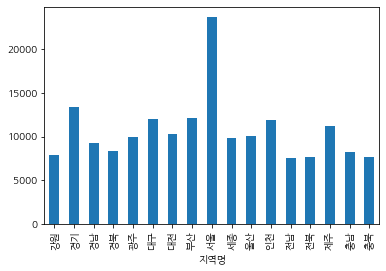

In [38]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
plt.rc("font", family="NanumGothic")
g = df_last.groupby(["지역명"])["평당분양가격"].mean()

g.plot(kind="bar")


<AxesSubplot:xlabel='지역명'>

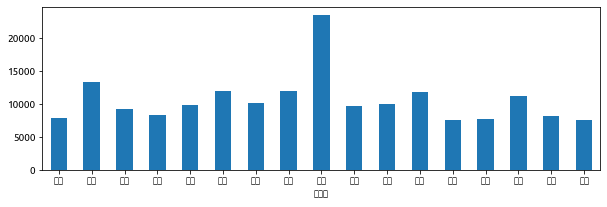

In [36]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g.plot.bar(rot=0, figsize=(10,3))


전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

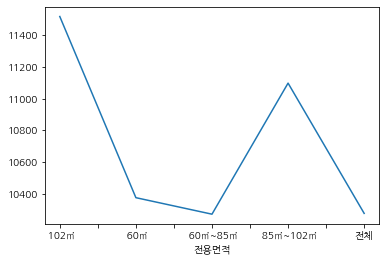

In [39]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df_last.groupby(["전용면적"])["평당분양가격"].mean().plot().bar()

In [ ]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<AxesSubplot:>

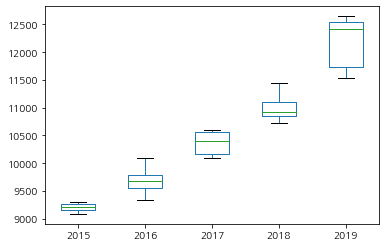

In [47]:
# index를 월, columns 를 연도로 구하고 평당분양가격 으로 pivot_table 을 구하고 상자수염그림을 그립니다.
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

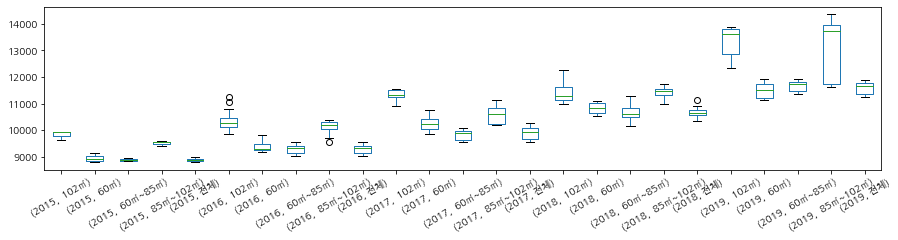

In [51]:
# columns 에 "연도", "전용면적"을 추가해서 pivot_table 을 만들고 시각화 합니다.
df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격").plot.box(figsize=(15,3), rot=30)


<AxesSubplot:xlabel='연도'>

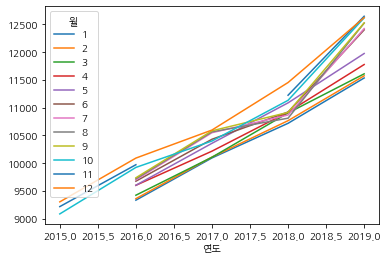

In [55]:
# index를 월, columns 를 지역명으로 구하고 평당분양가격 으로 pivot_table 을 구하고 선그래프를 그립니다.
df_last.pivot_table(index="연도", columns=["월"], values="평당분양가격").plot.line()


### Seaborn 으로 시각화 해보기

In [56]:
# 라이브러리 로드하기
%pip install seaborn


     |████████████████████████████████| 285 kB 971 kB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 6.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [58]:
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

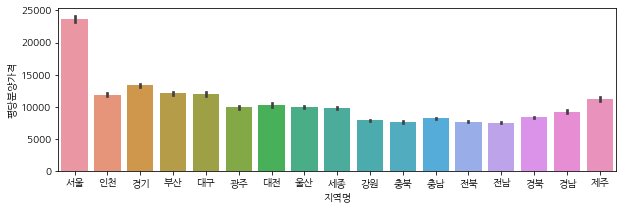

In [67]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10,3))
sns.barplot(data = df_last, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

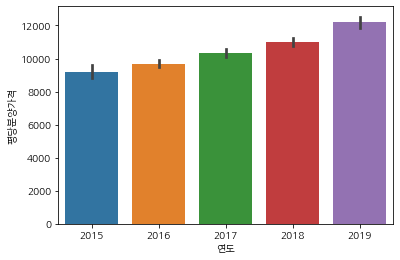

In [68]:
# barplot으로 연도별 평당분양가격을 그려봅니다.
sns.barplot(data=df_last, x="연도", y="평당분양가격")


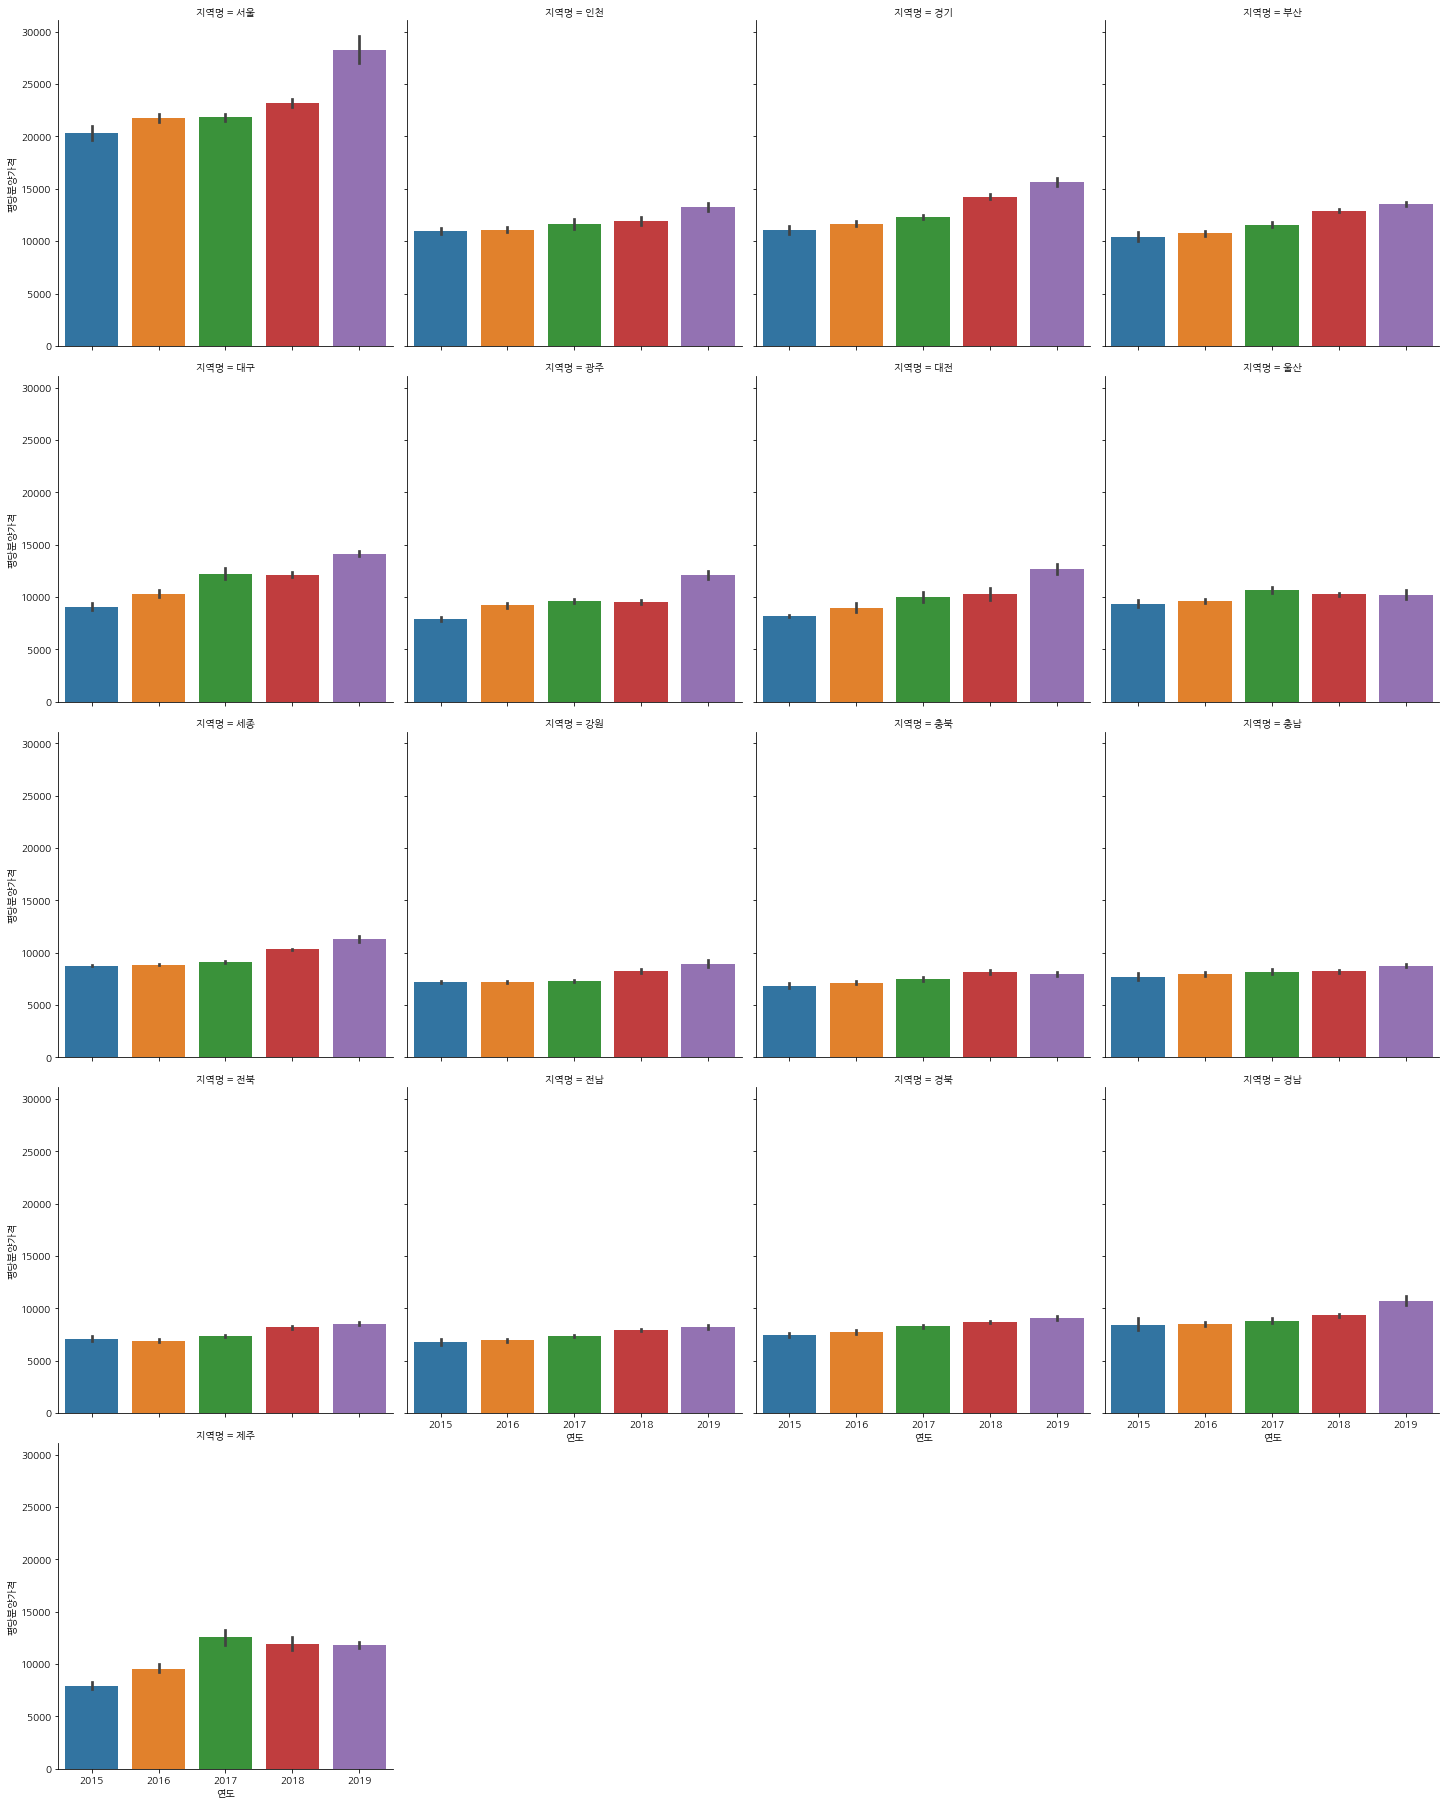

In [84]:
# catplot 으로 서브플롯 그리기
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

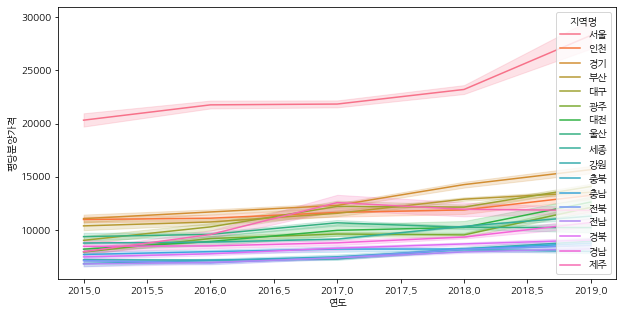

In [74]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.

plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")


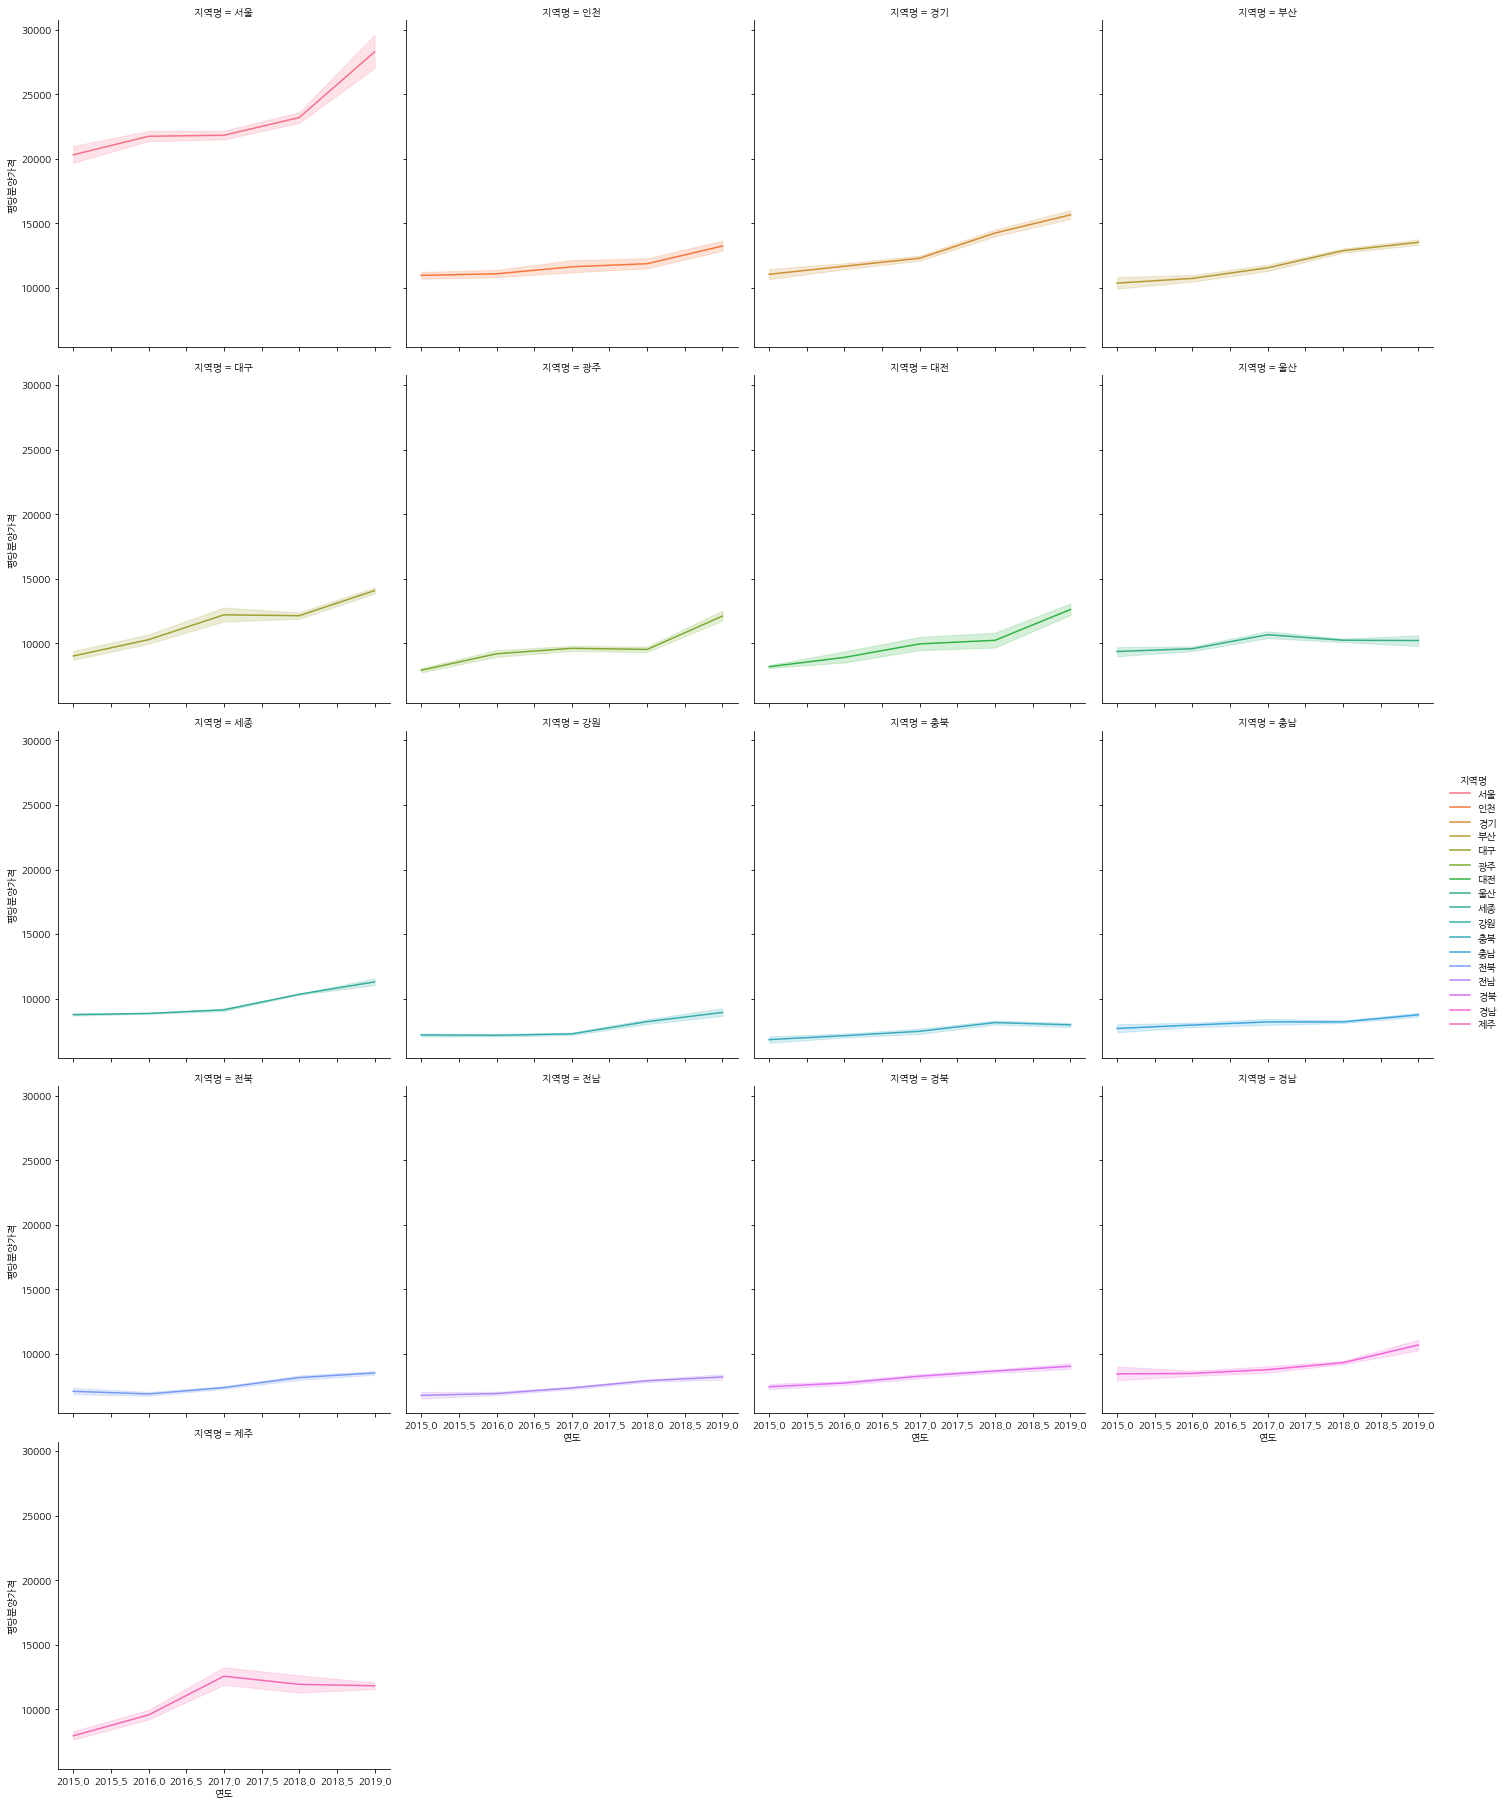

In [81]:
# relplot 으로 서브플롯 그리기
sns.relplot(data=df_last, x="연도", y="평당분양가격", kind="line", hue="지역명", col="지역명", col_wrap=4)


### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

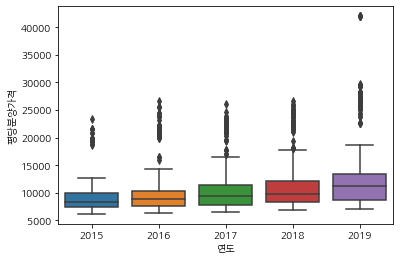

In [89]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값
sns.boxplot(data=df_last, x="연도", y="평당분양가격")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

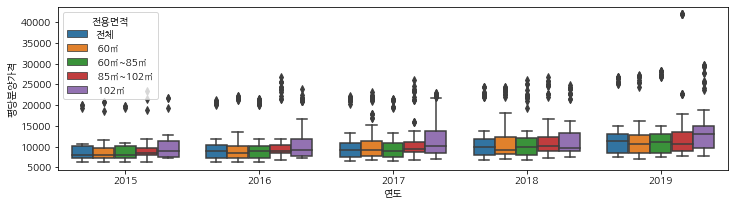

In [91]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

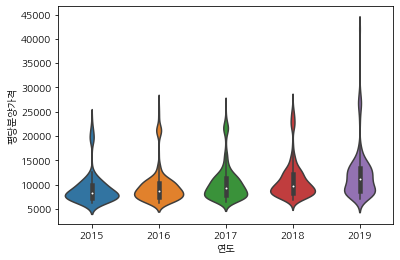

In [92]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
sns.violinplot(data=df_last, x="연도", y="평당분양가격")


### lmplot과 swarmplot 

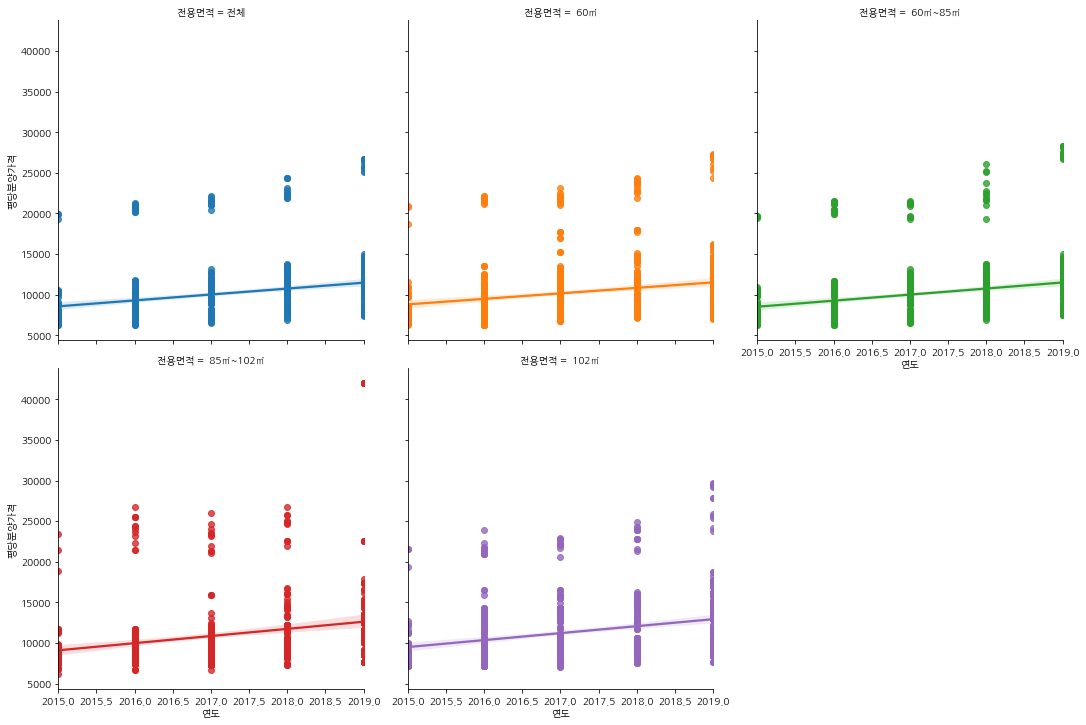

In [99]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3)


/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.p

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

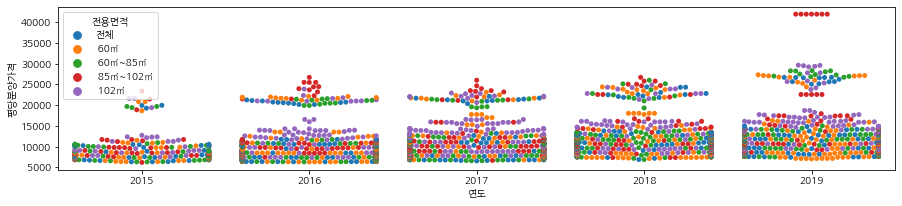

In [102]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")


### 이상치 보기

In [104]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [106]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [107]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

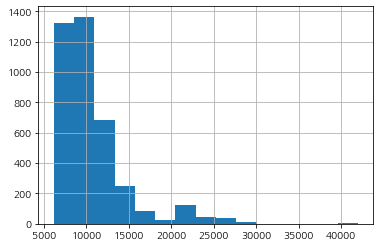

In [114]:
h = df_last["평당분양가격"].hist(bins=15)

In [118]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]


/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

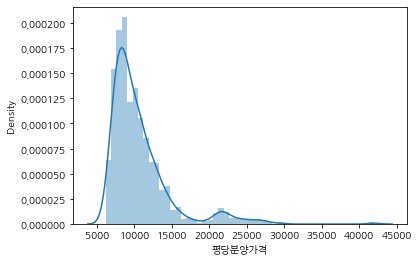

In [120]:
# distplot으로 평당분양가격을 표현해 봅니다.

sns.distplot(price)

In [ ]:
# sns.distplot(price, hist=False, rug=True)



* distplot을 산마루 형태의 ridge plot으로 그리기
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

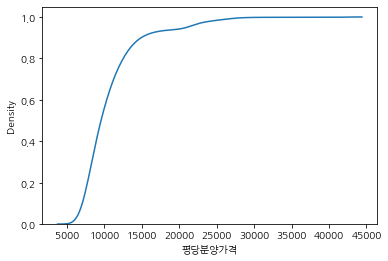

In [124]:
# subplot 으로 표현해 봅니다.

sns.kdeplot(price, cumulative=True)

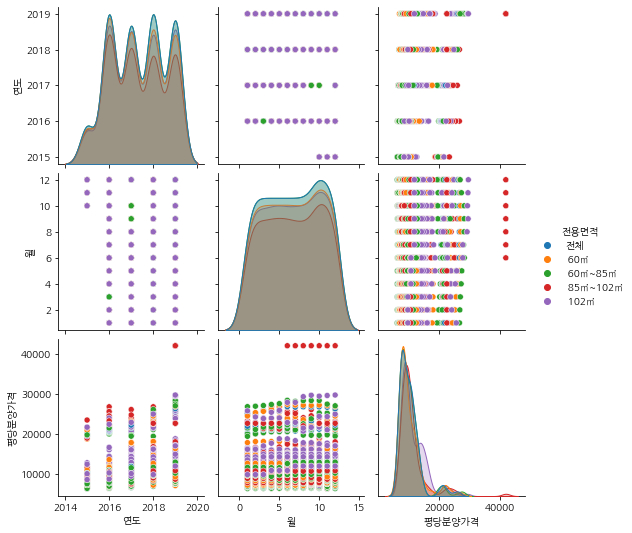

In [134]:
# pairplot
df_last_notull = df_last.loc[df_last["평당분양가격"].notnull(), ["연도", "월","평당분양가격", "전용면적"]]
sns.pairplot(df_last_notull, hue="전용면적")


In [136]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.

df_last["전용면적"].value_counts()

 102㎡        867
 60㎡~85㎡     867
 85㎡~102㎡    867
 60㎡         867
전체           867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [141]:
# 모든 컬럼이 출력되게 설정합니다.
pd.options.display.max_columns = 25
df_first


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [139]:
# head 로 미리보기를 합니다.

df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [142]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.

df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [145]:
# 결측치가 있는지 봅니다.
df_first.isnull().sum()


지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [146]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [147]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [ ]:
# head 로 미리보기 합니다.



In [152]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 

df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [157]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head()


,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [158]:
date = "2013년12월"
date

'2013년12월'

In [162]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split("년")


['2013', '12월']

In [163]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.
date.split("년")[0]


'2013'

In [165]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.
date.split("년")[-1].split("월")[0]


'12'

In [170]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_year(date):
    return int(date.split("년")[0])

In [171]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
parse_year(date)


2013

In [172]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_month(date):
    return int(date.split("년")[-1].split("월")[0])

In [173]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)


12

In [178]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)

In [179]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)

In [180]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.
df_first_melt.sample()


,지역명,기간,평당분양가격,연도,월
259,광주,2015년3월,7861,2015,3


In [181]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
4269,부산,2019,12,4322.0,14262.6,102㎡


In [187]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [191]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.

df_last_prepare = df_last[df_last["전용면적"] == "전체"][cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [194]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [197]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.

df = pd.concat([df_first_prepare, df_last_prepare])
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [202]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df.shape
df.head()
df.tail()

,지역명,연도,월,평당분양가격
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
4330,제주,2019,12,12810.6


In [205]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [210]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

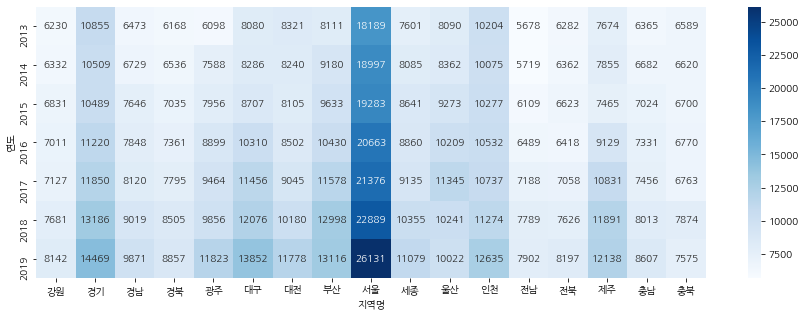

In [217]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
plt.figure(figsize=(15,5))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

In [218]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.
t.T


연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

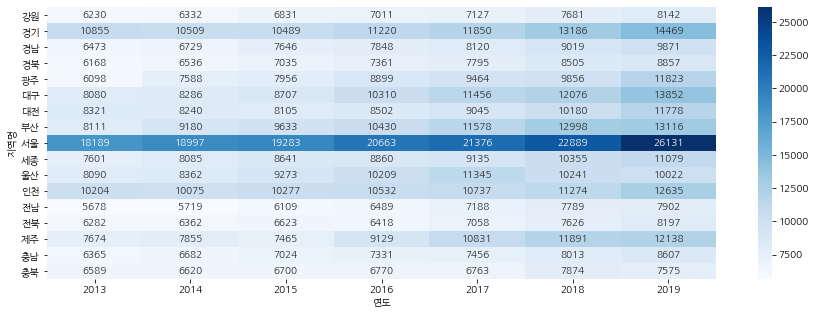

In [219]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.

plt.figure(figsize=(15,5))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")


In [223]:
# Groupby로 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.
g= df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()


<AxesSubplot:xlabel='연도', ylabel='지역명'>

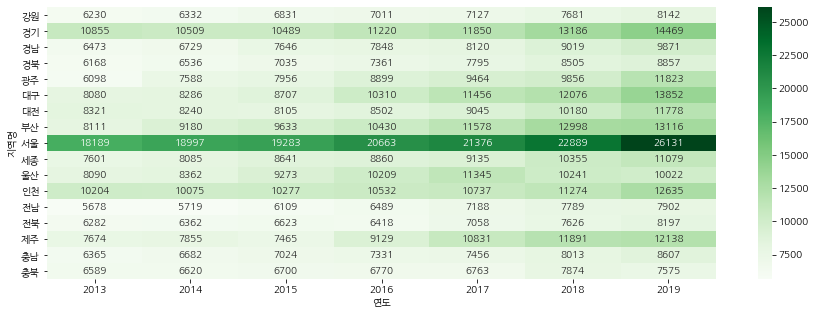

In [227]:
plt.figure(figsize=(15,5))
sns.heatmap(g.T, annot=True, fmt=".0f", cmap="Greens")

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

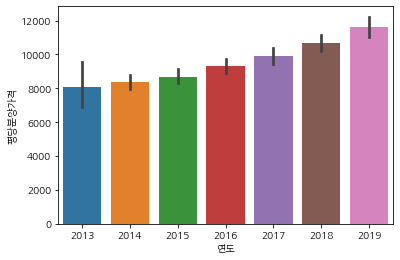

In [228]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

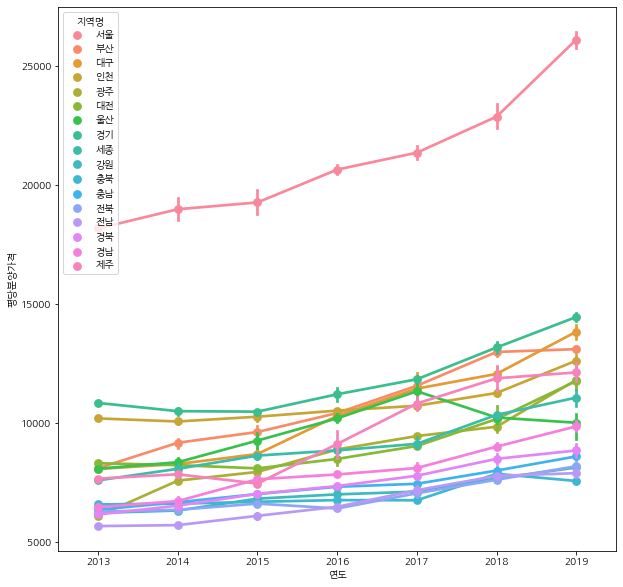

In [234]:
# pointplot 으로 연도별 평당분양가격 그리기
plt.figure(figsize=(10,10))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")

(72, 4)


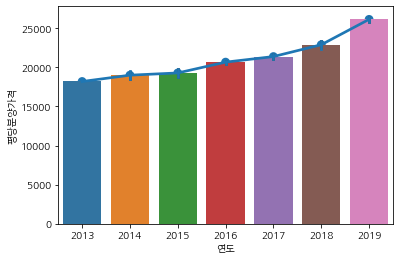

In [241]:
# 서울만 barplot 으로 그리기
df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

g = sns.barplot(data=df_seoul, x="연도", y="평당분양가격")
g1 = sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

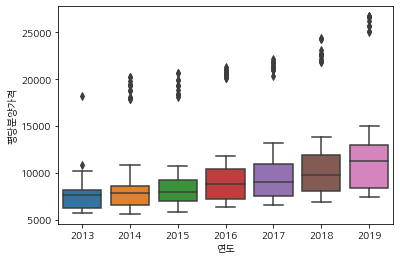

In [242]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x="연도", y="평당분양가격")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

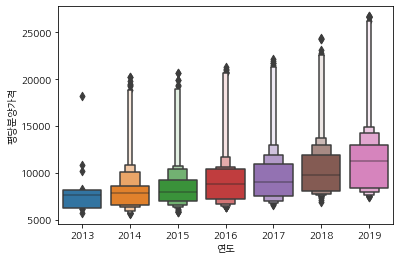

In [243]:

sns.boxenplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

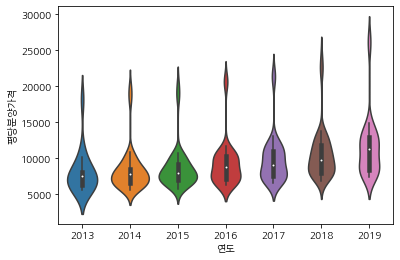

In [244]:
# 연도별 평당분양가격 violinplot 그리기
sns.violinplot(data=df, x="연도", y="평당분양가격")


/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

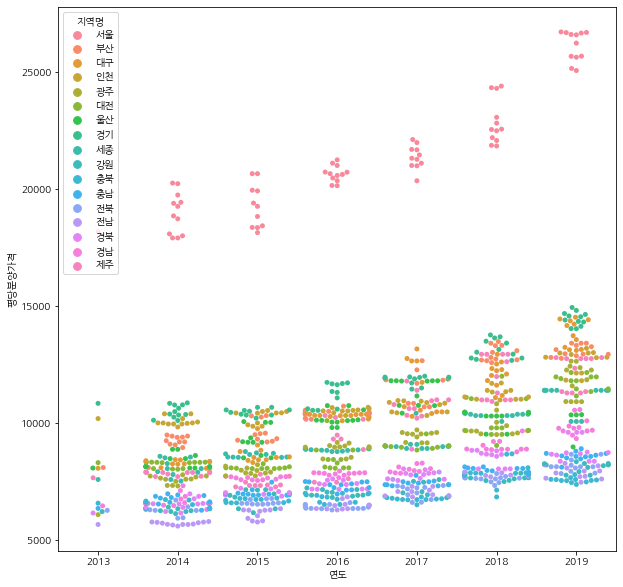

In [249]:
# 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(10,10))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

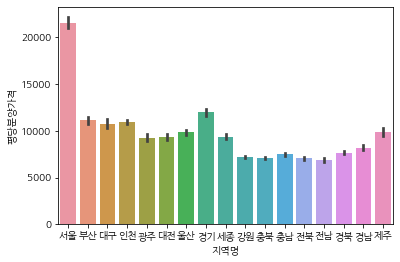

In [251]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
sns.barplot(data=df, x="지역명", y="평당분양가격")


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

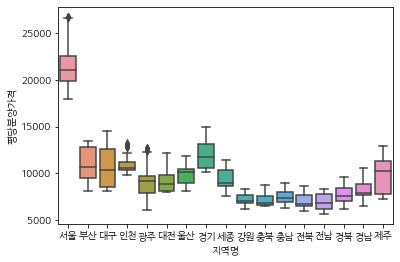

In [252]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

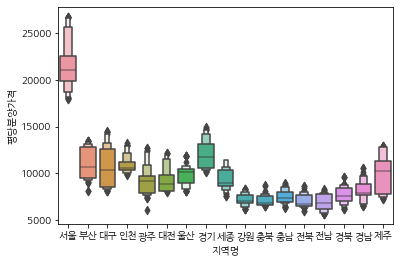

In [253]:
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

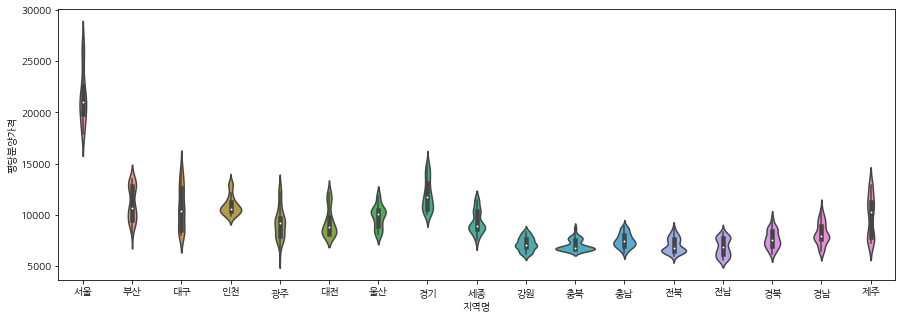

In [255]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kimjihoon/.local/lib/python3.8/site-packages/seaborn/categorical.p

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

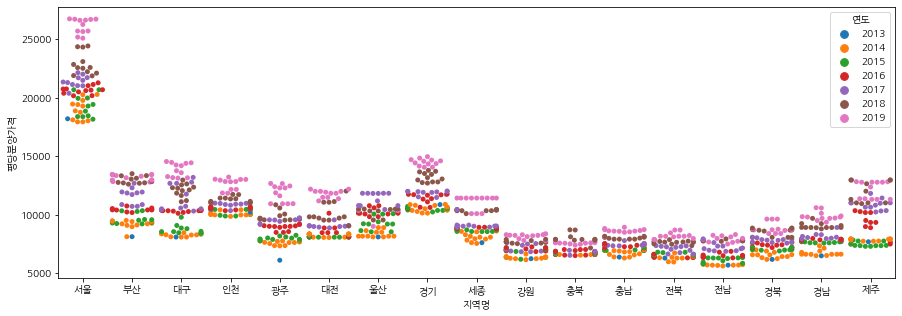

In [258]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")

<big> 고생 많으셨습니다! 다음 챕터도 화이팅 입니다!</big>